# Target
Predict how many cases in SJ of each day from 2008 to 2013<br>


# Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm']


<Figure size 432x288 with 0 Axes>

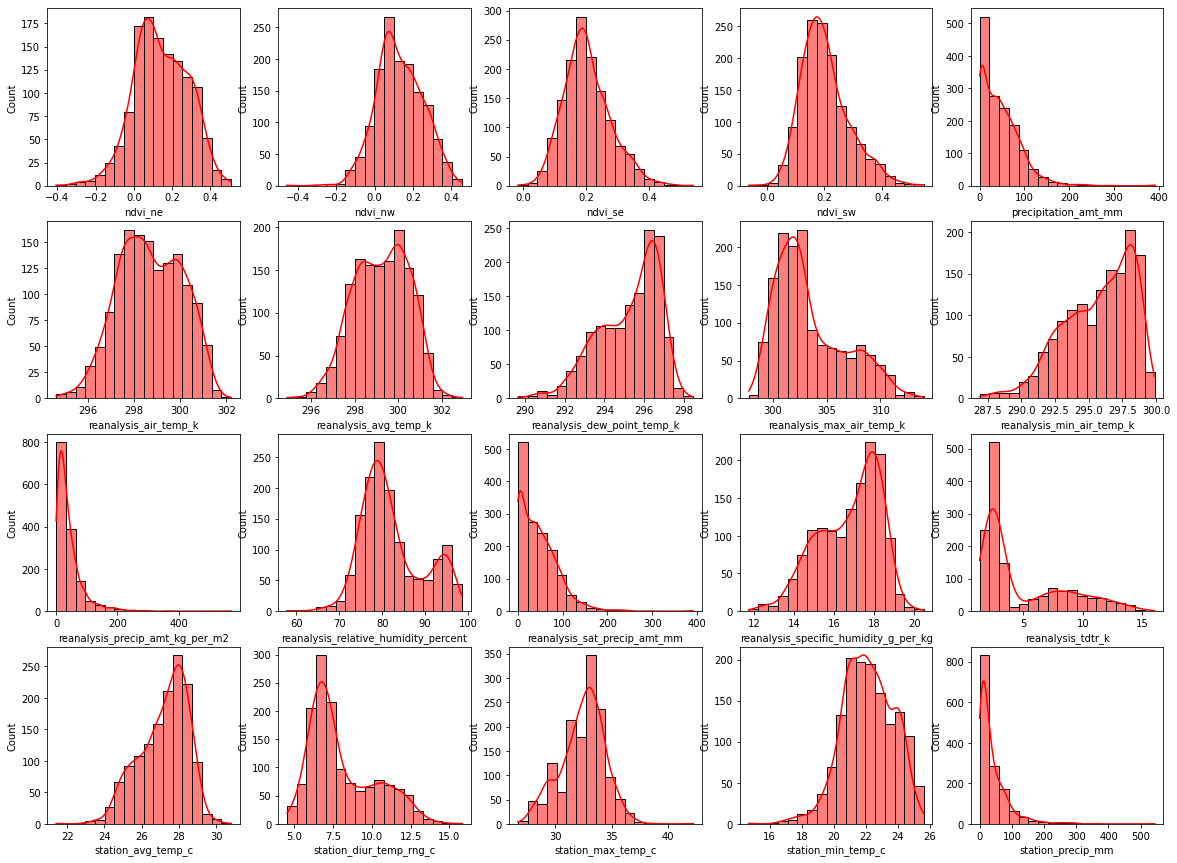

In [191]:
df = pd.read_csv("dengue_features_labels_train.csv")
names = list(df.iloc[:,4:24].columns.values)
print(names)
plt.figure()
plt.figure(figsize=(20,15))

for i, name in enumerate(names):
    i = i+1
    plt.subplot(4,5,i)
    sns.set_palette("hls") #设置所有图的颜色，使用hls色彩空间
    sns.histplot(df[name],color="r",bins=18,kde=True)
plt.show()


Text(0, 0.5, 'Cases')

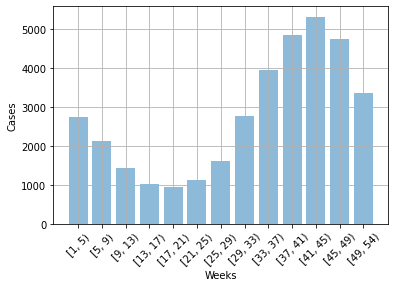

In [2]:

data_label = pd.read_csv("dengue_labels_train.csv")

# whole dataset
df = data_label.copy()

# san juan dataset
df_sj = df.loc[df['city']=='sj']

# iquitos dataset
df_iq = df.loc[df['city']=='iq']


month = [1, 5, 9, 13, 17, 21, 25, 29, 33,37, 41, 45, 49,54]
months =[ '[1, 5)' , '[5, 9)' , '[9, 13)' , '[13, 17)', '[17, 21)', '[21, 25)', '[25, 29)' , '[29, 33)', '[33, 37)' , '[37, 41)','[41, 45)', '[45, 49)','[49, 54)']
week = df.iloc[:,2]
segment = pd.cut(week,month,right = False)
#print(segment)


df['each_four_week']=segment

month_case = df.groupby('each_four_week')['total_cases'].sum()
plt.grid()
plt.xticks(rotation=45)
plt.bar(months, month_case, align='center', alpha=0.5)
plt.xlabel('Weeks')
plt.ylabel('Cases')

# save as a new csv file
#df.to_csv("new_label.csv") 


<ipython-input-3-91b00f267209>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sj['each_four_week']=segment_sj


Text(0.5, 1.0, 'Dengue in San Juan from 1990 to 2008')

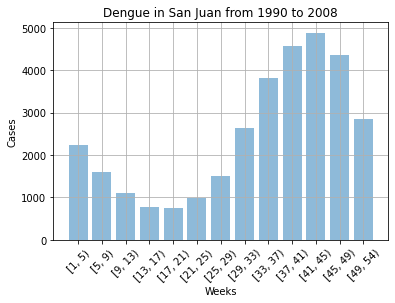

In [3]:
week_sj = df_sj.iloc[:,2]
segment_sj = pd.cut(week_sj,month,right = False)
#print(segment)


df_sj['each_four_week']=segment_sj

month_case_sj = df_sj.groupby('each_four_week')['total_cases'].sum()
plt.grid()
plt.xticks(rotation=45)
plt.bar(months, month_case_sj, align='center', alpha=0.5)
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.title('Dengue in San Juan from 1990 to 2008')


<ipython-input-4-7acc2eac3837>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iq['each_four_week']=segment_iq


Text(0.5, 1.0, 'Dengue in Iquitos from 2000 to 2010 ')

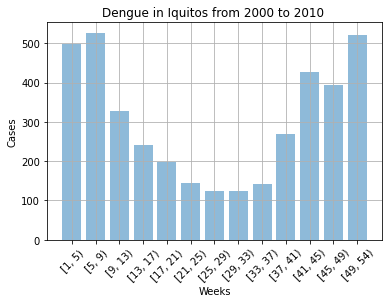

In [4]:
week_iq = df_iq.iloc[:,2]
segment_iq = pd.cut(week_iq,month,right = False)
#print(segment)


df_iq['each_four_week']=segment_iq

month_case_iq = df_iq.groupby('each_four_week')['total_cases'].sum()
plt.grid()
plt.xticks(rotation=45)
plt.bar(months, month_case_iq, align='center', alpha=0.5)
plt.xlabel('Weeks')
plt.ylabel('Cases')
plt.title('Dengue in Iquitos from 2000 to 2010 ')

From above analysis, we can find that in San Juan, the high risk of Dengue ranges from week 37 to week 49. And the high risk of Iquitos is from week 49 to week 9. Next I will do predictions to forecast the cases.


### Analyze SJ data

In [5]:
# build the csv file for SJ model
from sklearn.linear_model import LinearRegression

temp =pd.read_csv("dengue_features_labels_train.csv") 
train_sj_df = temp.loc[temp['city']=='sj']

train_sj_df.dropna(axis=0, how="any", subset=['station_avg_temp_c'])
#X.isnull().values.any()
train_sj_df.loc[(train_sj_df['year']=='1992') & (train_sj_df['weekofyear']=='1'),'station_avg_temp_c']

#train_sj_df.to_csv("train_sj_df.csv")


Series([], Name: station_avg_temp_c, dtype: float64)

In [186]:
train_sj_df =pd.read_csv("train_sj_df.csv") 
print(train_sj_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   930 non-null    object 
 1   year                                   930 non-null    int64  
 2   weekofyear                             930 non-null    int64  
 3   week_start_date                        930 non-null    object 
 4   ndvi_ne                                742 non-null    float64
 5   ndvi_nw                                884 non-null    float64
 6   ndvi_se                                914 non-null    float64
 7   ndvi_sw                                914 non-null    float64
 8   precipitation_amt_mm                   927 non-null    float64
 9   reanalysis_air_temp_k                  930 non-null    float64
 10  reanalysis_avg_temp_k                  930 non-null    float64
 11  reanal

In [194]:
# check each column Nan
np.where(np.isnan(train_sj_df.iloc[:,4:23]))[0]

#np.where(np.isnan(train_sj_df['reanalysis_sat_precip_amt_mm']))

array([], dtype=int64)

In [192]:
# fill the Nan with mode 
train_sj_df['ndvi_ne'] = train_sj_df['ndvi_ne'].fillna(train_sj_df['ndvi_ne'].mode()[0])
train_sj_df['ndvi_nw'] = train_sj_df['ndvi_nw'].fillna(train_sj_df['ndvi_nw'].mode()[0])
train_sj_df['ndvi_se'] = train_sj_df['ndvi_se'].fillna(train_sj_df['ndvi_se'].mode()[0])
train_sj_df['ndvi_sw'] = train_sj_df['ndvi_sw'].fillna(train_sj_df['ndvi_sw'].mode()[0])
train_sj_df['reanalysis_air_temp_k'] = train_sj_df['reanalysis_air_temp_k'].fillna(train_sj_df['reanalysis_air_temp_k'].mode()[0])

# precipitation_amt_mm & reanalysis_sat_precip_amt_mm has large ranges, so i just fillna with 0 cuz there are lots 0 as well
train_sj_df['precipitation_amt_mm'] = train_sj_df['precipitation_amt_mm'].fillna(0)
train_sj_df['reanalysis_sat_precip_amt_mm'] = train_sj_df['reanalysis_sat_precip_amt_mm'].fillna(0)

In [193]:
np.where(np.isnan(train_sj_df.iloc[:,4:23]))


(array([], dtype=int64), array([], dtype=int64))

### Feature Importance
Using random forest to claculate importance of each features

Features sorted by their importance:
[(0.244, 'ndvi_sw'), (0.189, 'ndvi_se'), (0.065, 'reanalysis_specific_humidity_g_per_kg'), (0.061, 'reanalysis_dew_point_temp_k'), (0.04, 'reanalysis_precip_amt_kg_per_m2'), (0.035, 'station_precip_mm'), (0.034, 'station_avg_temp_c'), (0.033, 'reanalysis_air_temp_k'), (0.031, 'reanalysis_tdtr_k'), (0.031, 'reanalysis_max_air_temp_k'), (0.03, 'reanalysis_relative_humidity_percent'), (0.029, 'station_max_temp_c'), (0.028, 'reanalysis_avg_temp_k'), (0.026, 'reanalysis_sat_precip_amt_mm'), (0.026, 'ndvi_nw'), (0.024, 'station_diur_temp_rng_c'), (0.02, 'reanalysis_min_air_temp_k'), (0.02, 'ndvi_ne'), (0.018, 'precipitation_amt_mm'), (0.015, 'station_min_temp_c')]


<AxesSubplot:xlabel='Importance', ylabel='Feature_Names'>

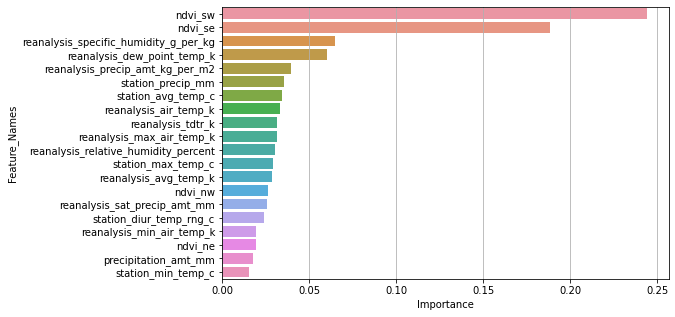

In [168]:
from sklearn.ensemble import RandomForestRegressor

temp_X = train_sj_df.iloc[:,4:24]
temp_y = train_sj_df['total_cases']
names = train_sj_df.iloc[:,4:24].columns.values.tolist()

#np.isnan(temp_X)
np.where(np.isnan(temp_X))
rf = RandomForestRegressor()
rf.fit(temp_X, temp_y)

print("Features sorted by their importance:")
print(sorted(zip(map(lambda x: round(x, 3), rf.feature_importances_), names), reverse=True))


importance = {'Feature_Names':names,
              'Importance':rf.feature_importances_}
importance_df = pd.DataFrame(importance)

plt.figure(figsize=(8,5))
plt.grid()
sns.barplot(x="Importance", y="Feature_Names", data=importance_df.sort_values(by="Importance", ascending=False))

### Analyze iq data
**The first cell below is not need to be run**

In [88]:
# build the csv file for SJ model, remove those lack most values rows， delete all the rows which features are all null
from sklearn.linear_model import LinearRegression

temp =pd.read_csv("dengue_features_labels_train.csv") 
train_iq_df = temp.loc[temp['city']=='iq']
train_iq_df

#train_iq_df.to_csv("train_iq_df.csv")


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,each_four_week,total_cases
936,iq,2000,26,2000/7/1,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,"[25, 29)",0
937,iq,2000,27,2000/7/8,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,"[25, 29)",0
938,iq,2000,28,2000/7/15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,"[25, 29)",0
939,iq,2000,29,2000/7/22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,"[29, 33)",0
940,iq,2000,30,2000/7/29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,"[29, 33)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010/5/28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,"[21, 25)",5
1452,iq,2010,22,2010/6/4,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,"[21, 25)",8
1453,iq,2010,23,2010/6/11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,"[21, 25)",1
1454,iq,2010,24,2010/6/18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,"[21, 25)",1


In [175]:
train_iq_df =pd.read_csv("train_iq_df.csv") 

print(train_iq_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   516 non-null    object 
 1   year                                   516 non-null    int64  
 2   weekofyear                             516 non-null    int64  
 3   week_start_date                        516 non-null    object 
 4   ndvi_ne                                515 non-null    float64
 5   ndvi_nw                                515 non-null    float64
 6   ndvi_se                                515 non-null    float64
 7   ndvi_sw                                515 non-null    float64
 8   precipitation_amt_mm                   516 non-null    float64
 9   reanalysis_air_temp_k                  516 non-null    float64
 10  reanalysis_avg_temp_k                  516 non-null    float64
 11  reanal

In [185]:
# check each column Nan
print(np.where(np.isnan(train_iq_df.iloc[:,4:23]))[0])

#print(np.where(np.isnan(train_iq_df['station_avg_temp_c']))[0])


[]


In [184]:
# in iq dataset, there are not many missing values, so just fill the Nan with mode 

train_iq_df['ndvi_ne'] = train_iq_df['ndvi_ne'].fillna(train_iq_df['ndvi_ne'].mode()[0])
train_iq_df['ndvi_nw'] = train_iq_df['ndvi_nw'].fillna(train_iq_df['ndvi_nw'].mode()[0])
train_iq_df['ndvi_se'] = train_iq_df['ndvi_se'].fillna(train_iq_df['ndvi_se'].mode()[0])
train_iq_df['ndvi_sw'] = train_iq_df['ndvi_sw'].fillna(train_iq_df['ndvi_sw'].mode()[0])
train_iq_df['reanalysis_air_temp_k'] = train_iq_df['reanalysis_air_temp_k'].fillna(train_iq_df['reanalysis_air_temp_k'].mode()[0])
train_iq_df['precipitation_amt_mm'] = train_iq_df['precipitation_amt_mm'].fillna(train_iq_df['precipitation_amt_mm'].mode()[0])
train_iq_df['station_avg_temp_c'] = train_iq_df['station_avg_temp_c'].fillna(train_iq_df['station_avg_temp_c'].mode()[0])
train_iq_df['station_diur_temp_rng_c'] = train_iq_df['station_diur_temp_rng_c'].fillna(train_iq_df['station_diur_temp_rng_c'].mode()[0])
train_iq_df['station_max_temp_c'] = train_iq_df['station_max_temp_c'].fillna(train_iq_df['station_max_temp_c'].mode()[0])
train_iq_df['station_min_temp_c'] = train_iq_df['station_min_temp_c'].fillna(train_iq_df['station_min_temp_c'].mode()[0])
train_iq_df['station_precip_mm'] = train_iq_df['station_precip_mm'].fillna(train_iq_df['station_precip_mm'].mode()[0])



**Successfully pre-processed sj and iq dateset**

In [174]:
# print(np.where(np.isnan(train_sj_df.iloc[:,4:23]))[0])
# train_sj_df
train_sj_df.to_csv("perfect_sj_data.csv",index=False)

In [25]:
print(np.where(np.isnan(train_iq_df.iloc[:,4:23]))[0])
train_iq_df
train_iq_df.to_csv("perfect_iq_data.csv",index=False)

[]


### process the dengue_features_test.csv

In [88]:
sj_test = pd.read_csv("sj_test.csv")
print(sj_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   258 non-null    object 
 1   year                                   258 non-null    int64  
 2   weekofyear                             258 non-null    int64  
 3   week_start_date                        258 non-null    object 
 4   ndvi_ne                                216 non-null    float64
 5   ndvi_nw                                248 non-null    float64
 6   ndvi_se                                258 non-null    float64
 7   ndvi_sw                                258 non-null    float64
 8   precipitation_amt_mm                   258 non-null    float64
 9   reanalysis_air_temp_k                  258 non-null    float64
 10  reanalysis_avg_temp_k                  258 non-null    float64
 11  reanal

In [89]:
# fill the Nan with mode 
sj_test['ndvi_ne'] = sj_test['ndvi_ne'].fillna(sj_test['ndvi_ne'].mode()[0])
sj_test['ndvi_nw'] = sj_test['ndvi_nw'].fillna(sj_test['ndvi_nw'].mode()[0])
sj_test['ndvi_se'] = sj_test['ndvi_se'].fillna(sj_test['ndvi_se'].mode()[0])
sj_test['ndvi_sw'] = sj_test['ndvi_sw'].fillna(sj_test['ndvi_sw'].mode()[0])
sj_test['reanalysis_air_temp_k'] = sj_test['reanalysis_air_temp_k'].fillna(sj_test['reanalysis_air_temp_k'].mode()[0])

sj_test['station_avg_temp_c'] = sj_test['station_avg_temp_c'].fillna(sj_test['station_avg_temp_c'].mode()[0])
sj_test['station_diur_temp_rng_c'] = sj_test['station_diur_temp_rng_c'].fillna(sj_test['station_diur_temp_rng_c'].mode()[0])
sj_test['station_max_temp_c'] = sj_test['station_max_temp_c'].fillna(sj_test['station_max_temp_c'].mode()[0])
sj_test['station_min_temp_c'] = sj_test['station_min_temp_c'].fillna(sj_test['station_min_temp_c'].mode()[0])
sj_test['station_precip_mm'] = sj_test['station_precip_mm'].fillna(sj_test['station_precip_mm'].mode()[0])

# precipitation_amt_mm & reanalysis_sat_precip_amt_mm has large ranges, so i just fillna with 0 cuz there are lots 0 as well
sj_test['precipitation_amt_mm'] = sj_test['precipitation_amt_mm'].fillna(0)
sj_test['reanalysis_sat_precip_amt_mm'] = sj_test['reanalysis_sat_precip_amt_mm'].fillna(0)


In [90]:
# check each column Nan
#np.where(np.isnan(train_sj_df.iloc[:,4:23]))[0]

np.where(np.isnan(sj_test['station_avg_temp_c']))[0]

array([], dtype=int64)

In [91]:
np.where(np.isnan(sj_test.iloc[:,4:23]))
sj_test.to_csv("perfect_sj_pred.csv",index=False)

# Model

## Linear Regression
Because the number of cases are continuous, not discrete

In [2]:
# import libraries for machine leanring
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

### iq model

In [282]:
# prepare the independent and dependent variables

train_sj_df = pd.read_csv("perfect_sj_data.csv")

X = train_sj_df.iloc[:,4:24]
y = train_sj_df["total_cases"]
# scaler = preprocessing.StandardScaler()
# scaler.fit(X)
X = preprocessing.scale(X)
#y = preprocessing.scale(y)


# split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


# build model
lr = LinearRegression()
lr.fit(X_train,y_train)
scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=5)
print(scores)   
    
# # predict on X_test
y_pred = lr.predict(X_test)
# print(len(y_pred))

# performacnce measurement
print("r^2: ",r2_score(y_test, y_pred))
print("MAE: ",mean_absolute_error(y_test, y_pred))


# # predict on test dataset   
lr_sj_pred_df = pd.read_csv("perfect_sj_pred.csv")
lr_sj_pred = lr_sj_pred_df.iloc[:,4:24]
lr_sj_pred = preprocessing.scale(lr_sj_pred)
new_pred = lr.predict(lr_sj_pred)

lr_sj_pred_df["Predicted_total_cases"] = new_pred
lr_sj_pred_df.to_csv("result_lr.csv",index=None)


[ 0.10997622  0.12328144 -0.07768523  0.13843516  0.0939687 ]
r^2:  0.07842170139151439
MAE:  29.556393408107525


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Predicted_total_cases
0,sj,2008,18,2008/4/29,-0.01890,-0.018900,0.102729,0.091200,78.60,298.492857,...,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,31.645283
1,sj,2008,19,2008/5/6,-0.01800,-0.012400,0.082043,0.072314,12.56,298.475714,...,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,31.770777
2,sj,2008,20,2008/5/13,-0.00150,0.003900,0.151083,0.091529,3.66,299.455714,...,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,17.700395
3,sj,2008,21,2008/5/20,-0.10100,-0.019867,0.124329,0.125686,0.00,299.690000,...,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,26.212803
4,sj,2008,22,2008/5/27,0.05680,0.039833,0.062267,0.075914,0.76,299.780000,...,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,53.318768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,sj,2013,13,2013/3/26,-0.08740,-0.016183,0.156343,0.105186,30.34,298.670000,...,78.780000,30.34,15.985714,3.314286,27.542857,7.942857,33.9,22.8,3.5,11.189985
254,sj,2013,14,2013/4/2,-0.20325,-0.077833,0.204171,0.178914,6.55,298.035714,...,81.650000,6.55,15.881429,2.828571,26.642857,6.642857,33.3,22.8,17.6,40.160058
255,sj,2013,15,2013/4/9,-0.11760,-0.008200,0.192700,0.170429,0.00,299.057143,...,78.285714,0.00,16.212857,3.171429,27.914286,8.114286,32.8,23.3,9.4,20.311117
256,sj,2013,16,2013/4/16,0.08275,0.031200,0.135014,0.074857,0.00,298.912857,...,77.674286,0.00,15.965714,3.042857,27.728571,6.942857,31.7,23.9,22.9,7.948683


In [283]:
print("MAE: ",mean_absolute_error(y_test, y_pred))

MAE:  29.556393408107525


In [273]:
len(X[0:260,0])

260

['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm']


<Figure size 432x288 with 0 Axes>

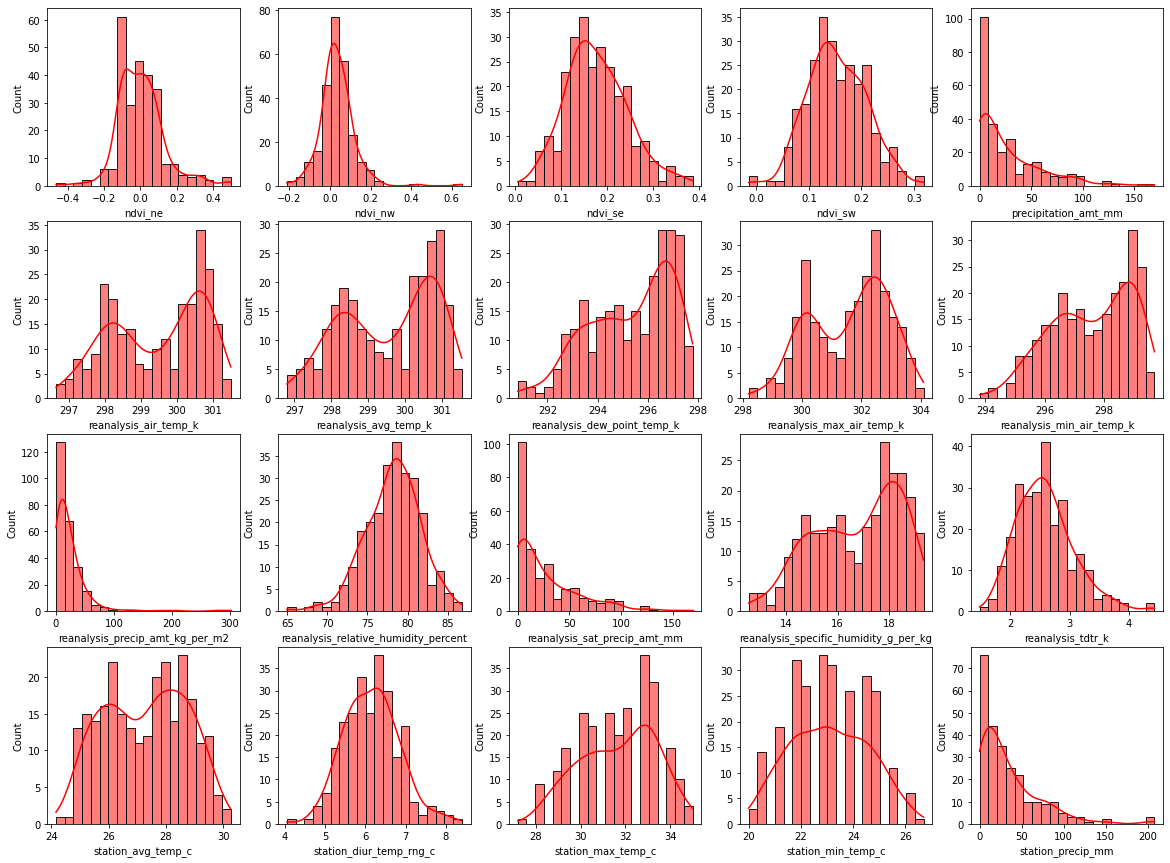

In [82]:

names = list(lr_sj_pred_df.iloc[:,4:24].columns.values)
print(names)
plt.figure()
plt.figure(figsize=(20,15))

for i, name in enumerate(names):
    i = i+1
    plt.subplot(4,5,i)
    sns.set_palette("hls") #设置所有图的颜色，使用hls色彩空间
    sns.histplot(lr_sj_pred_df[name],color="r",bins=20,kde=True)
plt.show()

## Negative binomial regression

In [8]:
from patsy import dmatrices
import statsmodels.api as sm

In [121]:
sj_df = pd.read_csv("perfect_sj_data.csv", header=0, infer_datetime_format=True, parse_dates=["week_start_date"], index_col=["week_start_date"])

ds = sj_df.index.to_series()
sj_df['MONTH'] = ds.dt.month
sj_df['DAY_OF_WEEK'] = ds.dt.dayofweek
sj_df['DAY'] = ds.dt.day

train = np.random.rand(len(sj_df)) < 0.8
sj_df_train = sj_df[train]
sj_df_test = sj_df[~train]
print('Training data set length='+str(len(sj_df_train)))
print('Testing data set length='+str(len(sj_df_test)))



Training data set length=744
Testing data set length=186


**1.configure and fit the Poisson regression model on the training data set.**

Variables:<br>
MONTH+weekofyear+ndvi_ne+ndvi_nw+ndvi_se+ndvi_sw+precipitation_amt_mm+reanalysis_air_temp_k+reanalysis_avg_temp_k+reanalysis_dew_point_temp_k+reanalysis_max_air_temp_k+reanalysis_min_air_temp_k+reanalysis_precip_amt_kg_per_m2+reanalysis_relative_humidity_percent+reanalysis_sat_precip_amt_mm+reanalysis_specific_humidity_g_per_kg+reanalysis_tdtr_k+station_avg_temp_c+station_diur_temp_rng_c+station_max_temp_c+station_min_temp_c+station_precip_mm

In [122]:
# all feature
#expr = """total_cases ~ MONTH +weekofyear+ndvi_ne+ndvi_nw+ndvi_se+ndvi_sw+precipitation_amt_mm+reanalysis_air_temp_k+reanalysis_avg_temp_k+reanalysis_dew_point_temp_k+reanalysis_max_air_temp_k+reanalysis_min_air_temp_k+reanalysis_precip_amt_kg_per_m2+reanalysis_relative_humidity_percent+reanalysis_sat_precip_amt_mm+reanalysis_specific_humidity_g_per_kg+reanalysis_tdtr_k+station_avg_temp_c+station_diur_temp_rng_c+station_max_temp_c+station_min_temp_c+station_precip_mm"""

#select feature
expr = """total_cases ~ MONTH +weekofyear+ndvi_ne+ndvi_nw+ndvi_se+ndvi_sw+reanalysis_air_temp_k+reanalysis_avg_temp_k+reanalysis_dew_point_temp_k+reanalysis_max_air_temp_k+reanalysis_relative_humidity_percent+reanalysis_specific_humidity_g_per_kg+station_avg_temp_c+station_diur_temp_rng_c+station_max_temp_c+station_min_temp_c"""

In [123]:
y_train, X_train = dmatrices(expr, sj_df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, sj_df_test, return_type='dataframe')

Using the statsmodels GLM class, train the Poisson regression model on the training data set.

In [124]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            total_cases   No. Observations:                  744
Model:                            GLM   Df Residuals:                      727
Model Family:                 Poisson   Df Model:                           16
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13338.
Date:                Fri, 08 Oct 2021   Deviance:                       23126.
Time:                        16:14:32   Pearson chi2:                 3.21e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [125]:
print(poisson_training_results.mu)
print(len(poisson_training_results.mu))

[ 15.95819592  25.50984905  20.78121626  22.99316972  29.84607621
  16.7824613   32.53261691  29.83639416  48.28590873  47.22957453
  31.85500479  37.1623218   37.82452337  34.80121371  42.48714371
  50.14334145  53.25761281  38.17202404  76.31678467  52.99871623
  65.16276494  62.69381832  55.18991115  57.57438776  50.81927611
  87.334199    87.13155808  53.83811062  47.72155698  43.08576432
  88.37959287  41.70868576  10.02098126   5.99385192   9.94531602
  17.47817638  19.8171491   22.25105394  25.38262949  23.92712468
  14.42922134  14.02494066  21.99621253  21.96700731  23.16191206
  27.91218926  14.32678353  45.09947043  40.88963763  36.84679019
  24.48675186  39.80468719  46.06078879  42.13052811  42.72485896
  48.4043515   45.08380624  61.06852438  32.81268185  73.87844741
  73.82349637  60.74799535  90.64002083  62.54529724  71.70596127
  64.08210406  90.08250104  73.51652355  55.16966856  49.52096579
  25.54642581  82.49034997  12.67753912  15.66802011  10.54593409
  13.15631

**2.fit the auxiliary OLS regression model on the data set and use the fitted model to get the value of α.**


In [126]:
import statsmodels.formula.api as smf

In [127]:
sj_df_train['cases_LAMBDA'] = poisson_training_results.mu

<ipython-input-127-f185a690a827>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sj_df_train['cases_LAMBDA'] = poisson_training_results.mu


In [128]:
sj_df_train['AUX_OLS_DEP'] = sj_df_train.apply(lambda x: ((x['total_cases'] - x['cases_LAMBDA'])**2 - x['cases_LAMBDA']) / x['cases_LAMBDA'], axis=1)

<ipython-input-128-d6e77934f73d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sj_df_train['AUX_OLS_DEP'] = sj_df_train.apply(lambda x: ((x['total_cases'] - x['cases_LAMBDA'])**2 - x['cases_LAMBDA']) / x['cases_LAMBDA'], axis=1)


In [129]:
ols_expr = """AUX_OLS_DEP ~ cases_LAMBDA - 1"""

In [130]:
aux_olsr_results = smf.ols(ols_expr, sj_df_train).fit()
print("alpha: ",aux_olsr_results.params[0])
print("t value: ",aux_olsr_results.tvalues[0])

alpha:  1.1033798189870836
t value:  8.700342467112861


**3.supply the value of alpha found in previous step intoNegativeBinomial class, and train the NB2 model.**

In [131]:
nb2_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()
print(nb2_training_results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            total_cases   No. Observations:                  744
Model:                            GLM   Df Residuals:                      727
Model Family:        NegativeBinomial   Df Model:                           16
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3309.8
Date:                Fri, 08 Oct 2021   Deviance:                       636.63
Time:                        16:14:38   Pearson chi2:                     850.
No. Iterations:                    44                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

**4.predict test case using NB2 model.**

In [132]:
nb2_predictions = nb2_training_results.get_prediction(X_test)
predictions_summary_frame = nb2_predictions.summary_frame()
print(predictions_summary_frame)

                      mean    mean_se  mean_ci_lower  mean_ci_upper
week_start_date                                                    
1990-07-16       38.363108   5.262500      29.319010      50.197058
1990-09-10       83.112946  20.824239      50.862436     135.812642
1990-12-10       51.979111  15.657742      28.801837      93.807488
1991-01-01       21.489042   3.831490      15.151237      30.477969
1991-01-08        8.524820   1.407911       6.167449      11.783243
...                    ...        ...            ...            ...
2007-10-22       31.796814   4.518813      24.066606      42.009968
2007-12-03       36.092095   5.970916      26.097151      49.915002
2008-02-05       14.295110   3.193096       9.226878      22.147270
2008-03-18       19.040711   2.523673      14.684668      24.688925
2008-04-01       12.688626   1.764567       9.661414      16.664356

[186 rows x 4 columns]


<Figure size 432x288 with 0 Axes>

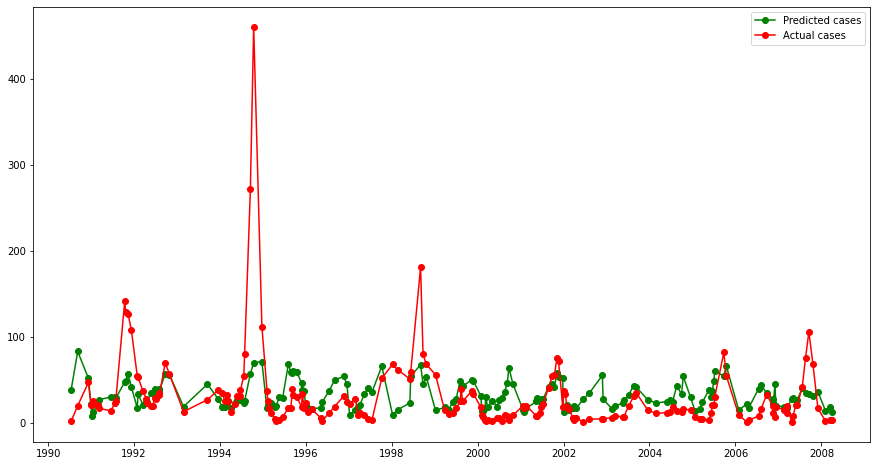

In [133]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['total_cases']
fig = plt.figure()
plt.figure(figsize=(15,8))
fig.suptitle('Predicted total cases')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted cases')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual cases')
plt.legend(handles=[predicted, actual])
plt.show()

**5.performance of NB2 model**

In [134]:
print("MAE: ",mean_absolute_error(actual_counts, predicted_counts))

MAE:  22.33062136068419


**6. test the target dataset**

In [224]:
print(predicted_counts[0:10])
print(actual_counts[0:10])

week_start_date
1990-05-14    30.778884
1990-06-04    23.599130
1990-06-11    34.829165
1990-07-02    49.433096
1990-07-09    30.238221
1990-11-05    70.023717
1991-01-29    12.475463
1991-02-12    21.298612
1991-02-19    22.181875
1991-04-09    19.028676
Name: mean, dtype: float64
week_start_date
1990-05-14     4.0
1990-06-04     2.0
1990-06-11     4.0
1990-07-02     6.0
1990-07-09     8.0
1990-11-05    71.0
1991-01-29    37.0
1991-02-12    19.0
1991-02-19    25.0
1991-04-09    15.0
Name: total_cases, dtype: float64


### Predict dengue_features_test.csv

In [136]:
# this is for prediction dataset, not the test part in training data
sj_pred = pd.read_csv("perfect_sj_pred.csv", header=0, infer_datetime_format=True, parse_dates=["week_start_date"], index_col=["week_start_date"])

ds = sj_pred.index.to_series()
sj_pred['MONTH'] = ds.dt.month
sj_pred['DAY_OF_WEEK'] = ds.dt.dayofweek
sj_pred['DAY'] = ds.dt.day

sj_pred = sj_pred.drop(columns=['DAY', 'DAY_OF_WEEK','city','year','precipitation_amt_mm','reanalysis_precip_amt_kg_per_m2','station_precip_mm','reanalysis_min_air_temp_k','reanalysis_sat_precip_amt_mm','reanalysis_tdtr_k'])
last_col = sj_pred.pop(sj_pred.columns[-1])
sj_pred.insert(0, last_col.name, last_col)
sj_pred.insert(0, 'Intercept', 1.0)
sj_pred

# pred in model
nb2_predictions = nb2_training_results.get_prediction(sj_pred)
sj_predictions_summary_frame = nb2_predictions.summary_frame()
#print(sj_predictions_summary_frame['mean'])
sj_pred["Predicted_total_cases"] = sj_predictions_summary_frame['mean']
sj_pred.to_csv("test.csv")

In [227]:
X_test

,Intercept,MONTH,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c
week_start_date,,,,,,,,,,,,,,,,,
1990-05-14,1.0,5.0,20.0,0.032250,0.172967,0.157200,0.170843,298.781429,298.878571,295.434286,300.5,82.052857,16.848571,26.714286,6.485714,32.2,22.8
1990-06-04,1.0,6.0,23.0,0.080200,0.174850,0.254314,0.181743,299.630000,299.764286,295.851429,302.4,79.891429,17.212857,28.114286,6.942857,34.4,23.9
1990-06-11,1.0,6.0,24.0,0.112900,0.092800,0.205071,0.210271,299.207143,299.221429,295.865714,301.3,82.000000,17.234286,27.414286,6.771429,32.2,23.3
1990-07-02,1.0,7.0,27.0,0.080200,0.121550,0.160683,0.202567,300.154286,300.278571,296.651429,302.3,81.281429,18.071429,28.328571,6.514286,33.9,24.4
1990-07-09,1.0,7.0,28.0,0.192875,0.082350,0.191943,0.152929,299.512857,299.592857,296.041429,301.8,81.467143,17.418571,27.557143,7.157143,31.7,21.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-12-10,1.0,12.0,50.0,-0.133050,-0.045550,0.151440,0.143171,298.900000,298.971429,294.774286,300.9,78.015714,16.130000,25.771429,5.085714,28.9,22.2
2008-02-05,1.0,2.0,6.0,-0.111700,-0.003200,0.232843,0.271171,297.237143,297.278571,291.537143,299.3,70.642857,13.225714,24.214286,5.157143,27.2,21.1
2008-03-04,1.0,3.0,10.0,-0.088900,-0.090033,0.223243,0.154186,297.878571,298.007143,293.052857,299.9,74.681429,14.474286,25.114286,6.114286,29.4,21.1
